In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
import os
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
img = cv2.imread('source//document.jpg')

In [3]:
#load and show the camera frame.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(<Axes: >, <matplotlib.image.AxesImage at 0x2966b573890>)

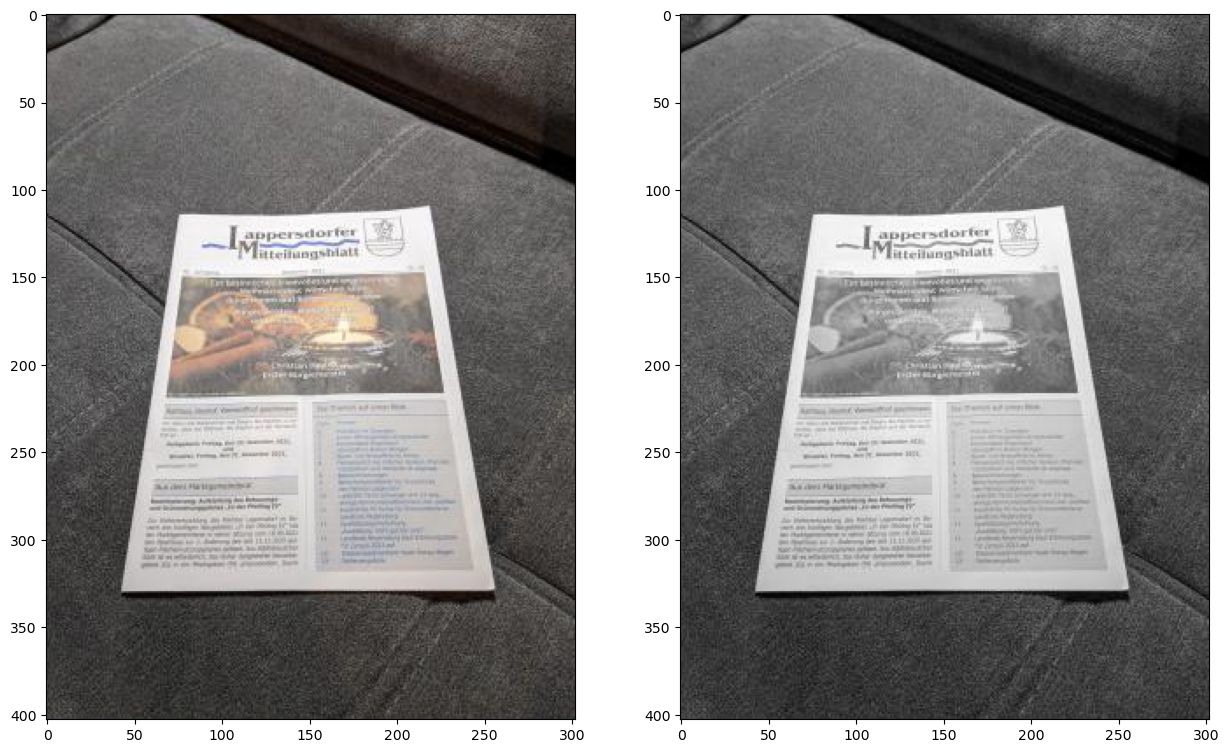

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)/255
rows, cols = gray.shape

# Let's plot the image
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(gray, cmap='gray')

In [5]:
top_left = [76, 115]
top_right = [219, 111]
bottom_left = [43, 330]
bottom_right = [256, 329]

(<Axes: >, <matplotlib.image.AxesImage at 0x2966d382e90>)

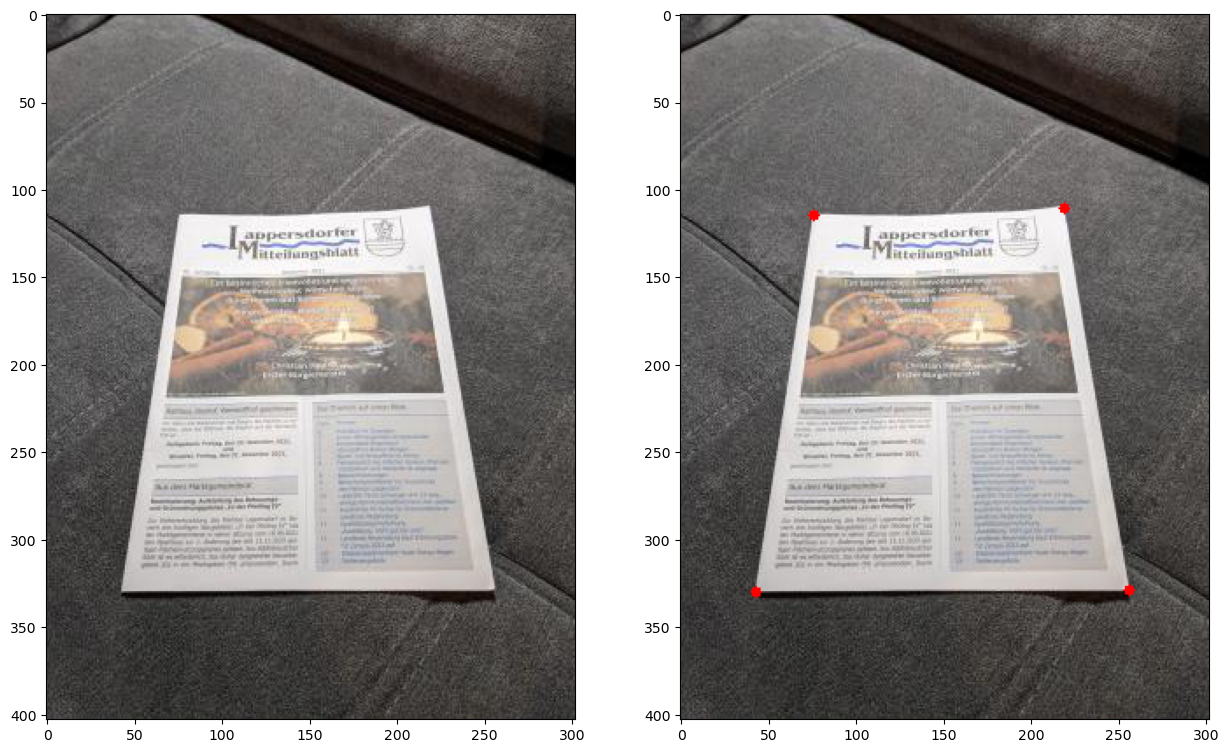

In [6]:
# Малюємо точки на кутах
out = np.copy(img)
out = cv2.circle(out, tuple(top_left), 3, (255,0,0), -1)
out = cv2.circle(out, tuple(top_right), 3, (255,0,0), -1)
out = cv2.circle(out, tuple(bottom_left), 3, (255,0,0), -1)
out = cv2.circle(out, tuple(bottom_right), 3, (255,0,0), -1)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(out)


In [8]:
# Define the matrix of source points corresponding to the 4 document corners.
# The matrix shall have shape (4, 2), i.e., 4 corners x 2 coordinates
# Note: You will need to explicitly use float32 data type
src = np.array([top_left, top_right, bottom_left, bottom_right], dtype=np.float32)

#Обчислюємо ширину і висоту документа
# По теоремі Піфаогора відстань між верхньою парою точок
width_bottom = np.sqrt(((bottom_right[0] - bottom_left[0])**2) + ((bottom_right[1] - bottom_left[1])**2))
# По теоремі Піфаогора відстань між нижньою парою точок
width_top = np.sqrt(((top_right[0] - top_left[0])**2) + ((top_right[1] - top_left[1])**2))
#Обираємо максимальну
maxWidth = max(int(width_bottom), int(width_top))

# По теоремі Піфаогора відстань між правою парою точок
height_right = np.sqrt(((top_right[0] - bottom_right[0])**2) + ((top_right[1] - bottom_right[1])**2))
# По теоремі Піфаогора відстань між лівою парою точок
height_left = np.sqrt(((top_left[0] - bottom_left[0])**2) + ((top_left[1] - bottom_left[1])**2))
#Обираємо максимальну
maxHeight = max(int(height_right), int(height_left))


# Define the matrix of target (destination) points corresponding to the 4 image corners.
# The matrix shall have shape (4, 2), i.e., 4 corners x 2 coordinates
# Note: You will need to explicitly use float32 data type
# Note2: The order of points in src and dst must be the same
dst = np.array([
    [0, 0],
    [maxWidth - 1, 0],
    [0, maxHeight - 1],
    [maxWidth - 1, maxHeight - 1]], dtype=np.float32)

(<Axes: >, <matplotlib.image.AxesImage at 0x2966c78e850>)

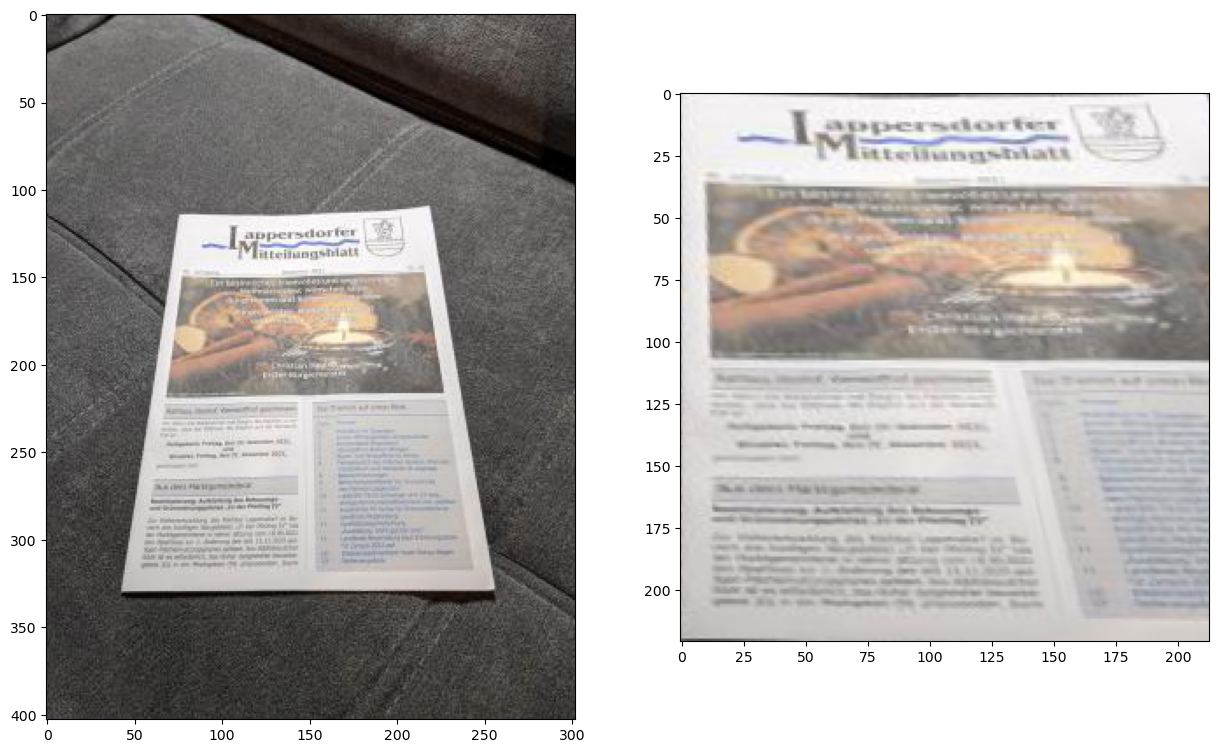

In [9]:
# Compute the affine transform matrix (you'll have to use getAffineTransform function from OpenCV here)
# Use the first 3 points from your src and dst matrix
M = cv2.getAffineTransform(src[0:3], dst[0:3])

# Build the rectified image using the computed matrix (you'll have to use warpAffine function from OpenCV here)
warped_first = cv2.warpAffine(img, M, (maxWidth, maxHeight))

# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(warped_first)

(<Axes: >, <matplotlib.image.AxesImage at 0x2966cc1ad50>)

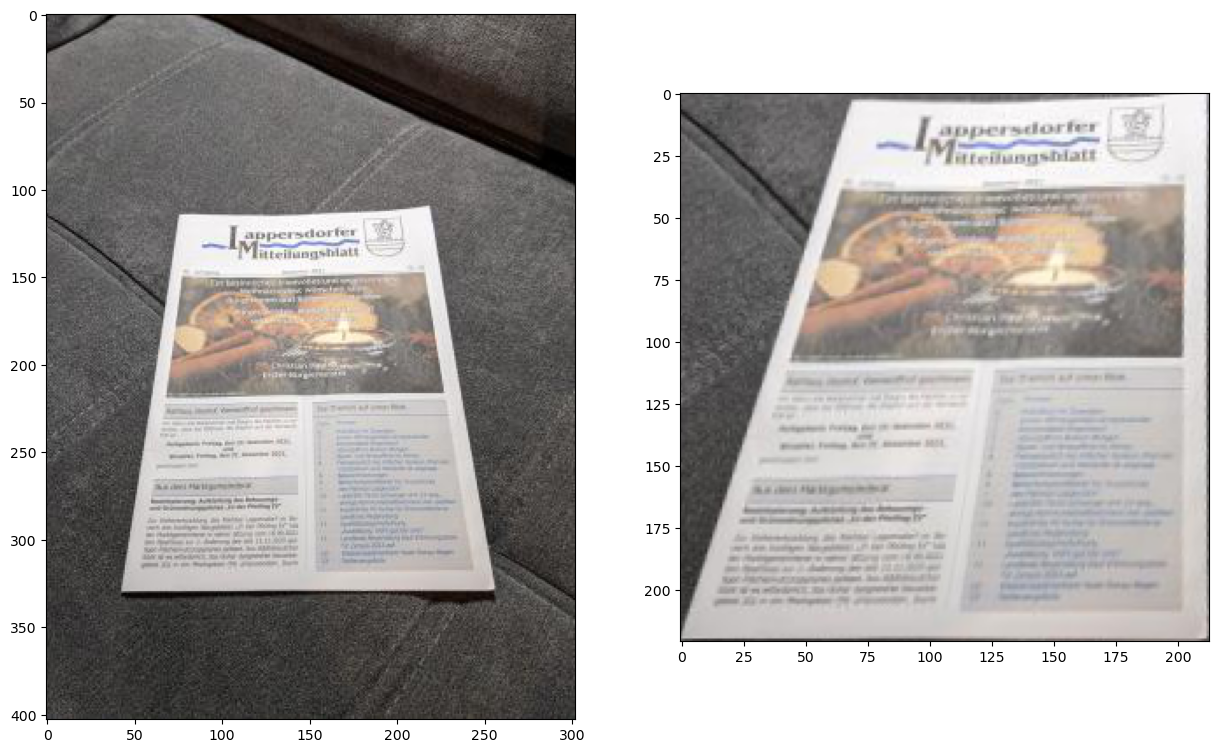

In [10]:
# Compute the affine transform matrix (use getAffineTransform)
# Use the last 3 points from your src and dst matrix
M = cv2.getAffineTransform(src[1:4], dst[1:4])

# Build the rectified image using the computed matrix (use warpAffine)
warped_last = cv2.warpAffine(img, M, (maxWidth, maxHeight))

# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(warped_last)

In [16]:
# Estimate the optimal affine transform matrix (you'll have to use estimateAffine2D function from OpenCV here)
# estimateAffine2D it returns the best fitting affine matrix as well as the vector of inliers (1 -> inlier,
# 0 -> outlier).
M, inliers = cv2.estimateAffine2D(src, dst)

print (inliers)

[[1]
 [1]
 [0]
 [1]]


(<Axes: >, <matplotlib.image.AxesImage at 0x2966e193250>)

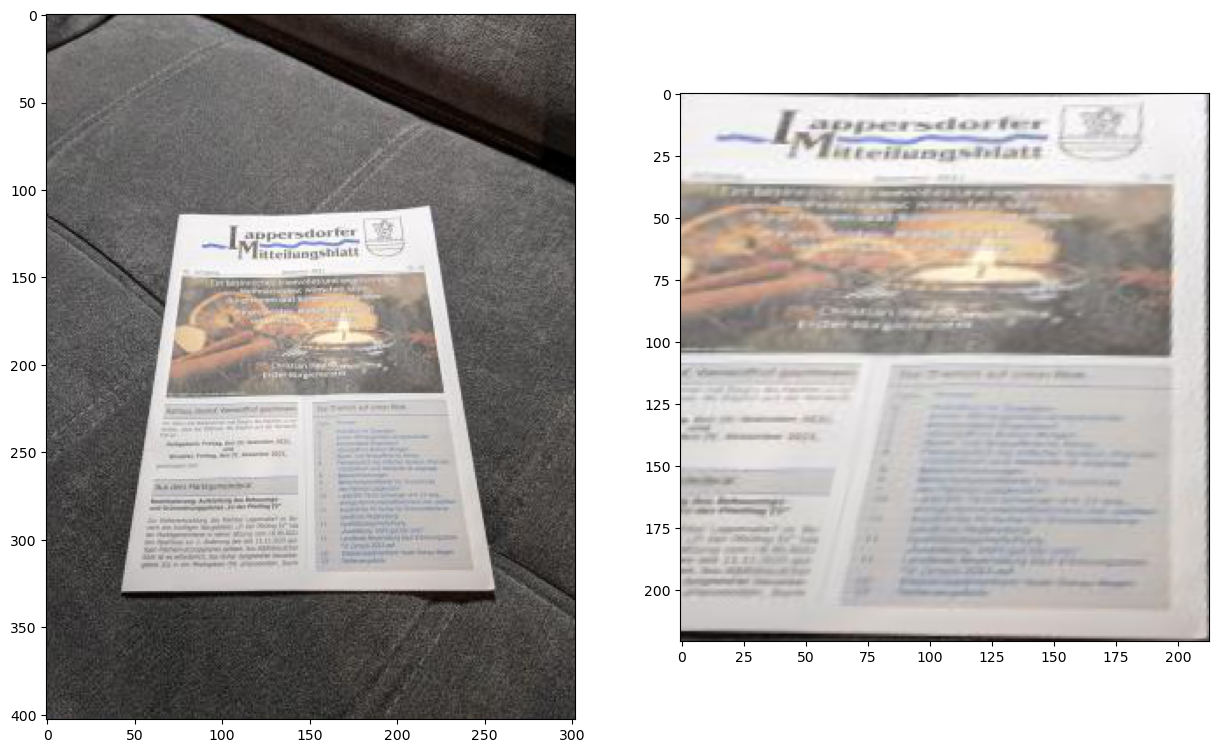

In [11]:
# Estimate the optimal affine transform matrix (you'll have to use estimateAffine2D function from OpenCV here)
# estimateAffine2D it returns the best fitting affine matrix as well as the vector of inliers (1 -> inlier,
# 0 -> outlier).
M, inliers = cv2.estimateAffine2D(src, dst)

# Build the rectified image using the computed matrix (use warpAffine)
warped_estimate = cv2.warpAffine(img, M, (maxWidth, maxHeight))

# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(warped_estimate)


(<Axes: >, <matplotlib.image.AxesImage at 0x2966da80190>)

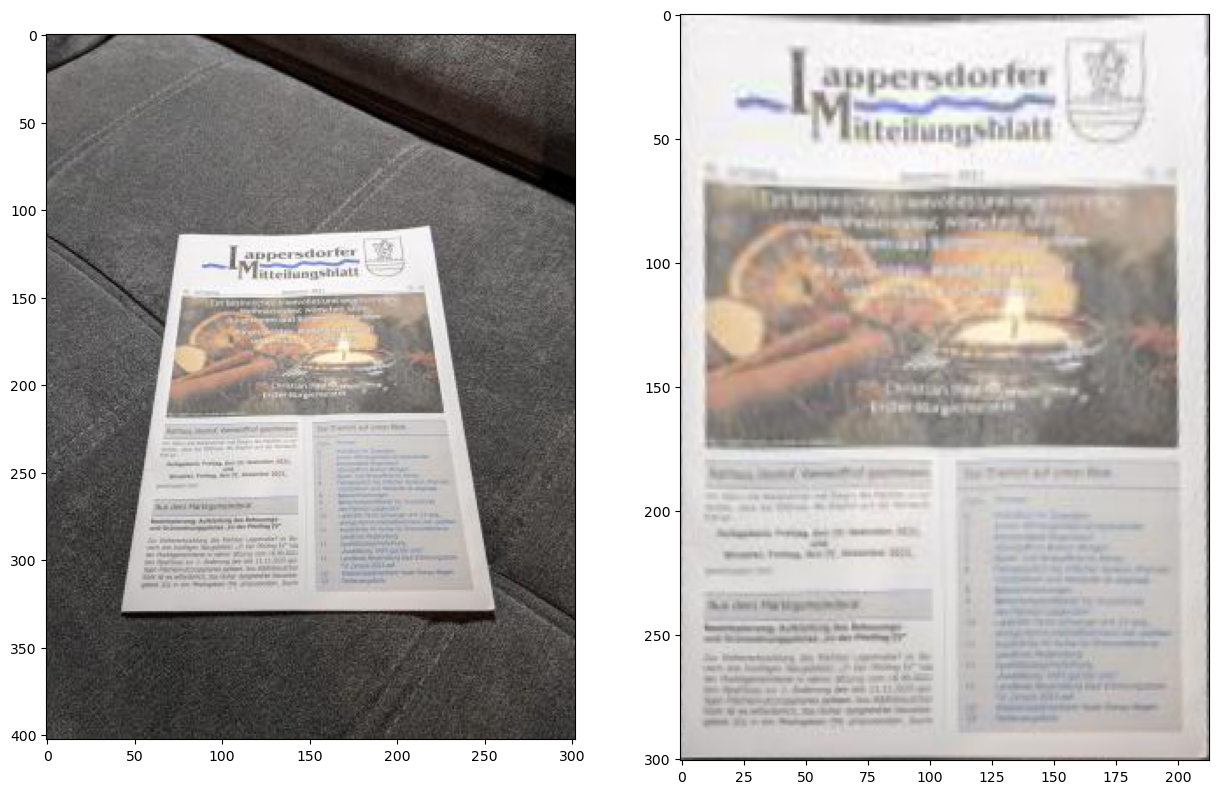

In [15]:
# Пропорційне переспективне перетворення
# Знайдемо правильну висоту документа, базауючись на співвідношенні сторін A4 (1:√2)
a4_ratio = math.sqrt(2)
doc_height = int(maxWidth * a4_ratio)
dst = np.array([
    [0, 0],
    [maxWidth - 1, 0],
    [0, doc_height - 1],
    [maxWidth - 1, doc_height - 1]], dtype=np.float32)  
M = cv2.getPerspectiveTransform(src, dst)
proportional_rectified = cv2.warpPerspective(img, M, (maxWidth, doc_height))

# Let's plot the results
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(proportional_rectified)

(<Axes: title={'center': 'Corrected Aspect Ratio'}>,
 Text(0.5, 1.0, 'Corrected Aspect Ratio'))

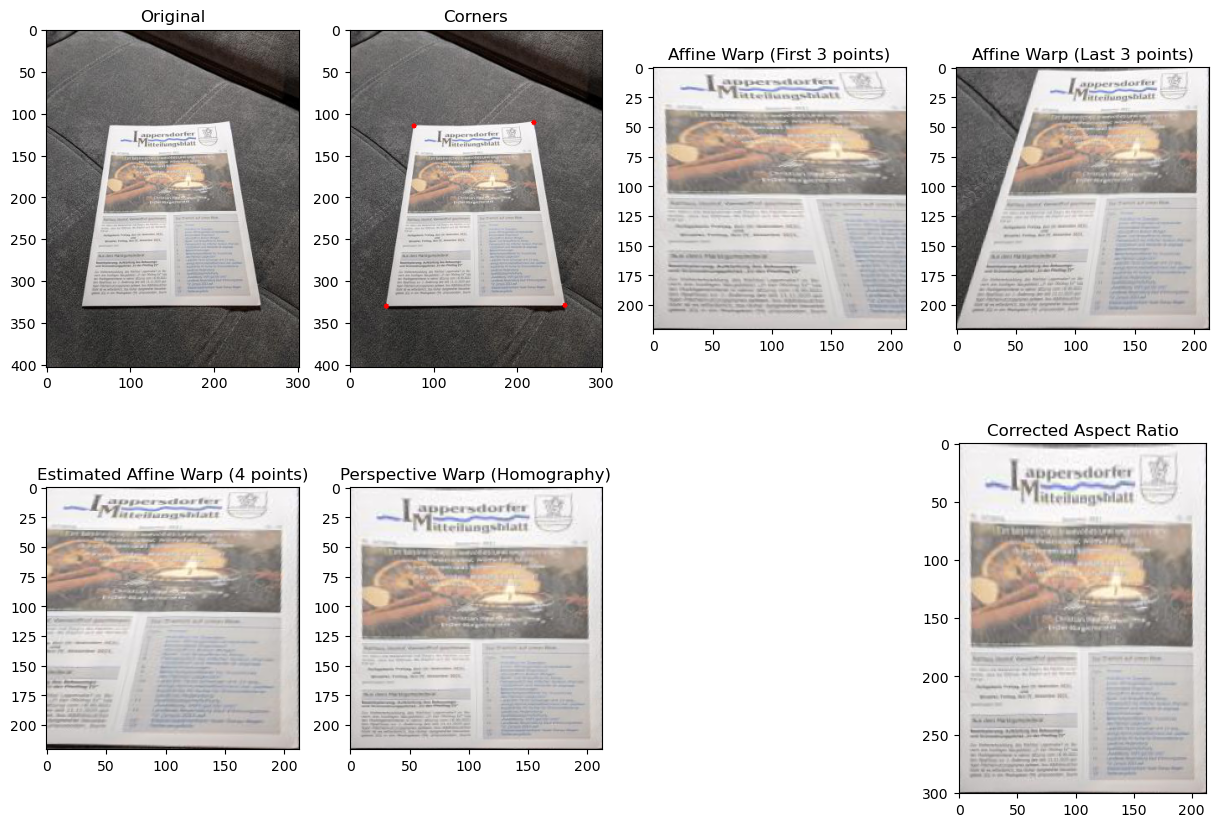

In [14]:
#Зробимо виведення усих результів перетворень в один subplot
plt.subplot(241), plt.imshow(img), plt.title('Original')
plt.subplot(242), plt.imshow(out), plt.title('Corners')
plt.subplot(243), plt.imshow(warped_first), plt.title('Affine Warp (First 3 points)')
plt.subplot(244), plt.imshow(warped_last), plt.title('Affine Warp (Last 3 points)')
plt.subplot(245), plt.imshow(warped_estimate), plt.title('Estimated Affine Warp (4 points)')
plt.subplot(246), plt.imshow(rectified), plt.title('Perspective Warp (Homography)')
plt.subplot(248), plt.imshow(proportional_rectified), plt.title('Corrected Aspect Ratio')

Questions

 - The affine transform does not seem to be working well in this case. Why?

_ томущо , афінне перетворення не може впоратись із викривленням, що породжує перспектива.
В афінному перетворенні можуть мінятись кути, але паралельність залишається, а в перспективному викревленні
усі паралельні лінії (окрім тих, що лежать в площині перпендикулярній напрямку камери) сходяться в точку сходу (точки схода) _

 - What can you tell me about the values you have obtained for the inliers vector? What does it mean?

_ цей вектор в моєму випадку має такий вигляд : [[1] [1] [0] [1]], що говорить про те, 
що при спробі знайти найкраще афінне перетоворення (cv2.estimateAffine2D(src, dst)) ми зупинились на варіанті, 
коли кут 1, кут 2 і кут 4 найкраще відповідають цьому перетворенню, а кут 3 вивалюється із цієї красоти,
як таке собі виключення із правила._

 - How does the result from homography look? Does it work well enough?

_звичайно, "досконалості немає меж", але із усих цих перетворень гомографічне є найкращим.
Важливим є розуміти справжню форму при цьому перетворенні, оскільки разомі із звуженням в даличінь,
ми отримуємо ще щось, накшталт логорифмічного зменшення по координаті Y, як от дерева здалеку 
здаються меншими ніж зблизька, а вданому випадку спотворились співвідношення ширини і висоти аркуша.
Щоб виправити це я, знаючи, що стандартний лист усих форматів A4, A3, A2, A1 etc. мають однакове співідношення сторін.
Це допомогло відтворити пропорційно аркуш. Тепер коло на аркуші буде колом а не еліпсом. Крім того, 
перспектива часто вносить ще такі похибки, як освітлення (якщо ми освітлюємо об'єкт із точки,
що безспосередньо знаходиться біля камери), зменшення чіткості зображення з причини фокусної відстані або туману тощо. 
І головне, при гомографічному перетворенні нікуди не дівається бочкоподібність, пов'язана із відомим оптичним ефеком,
оскільки все, що на оригінальному фото пряме, таким і залишається, а усе, що криве, теж залишається кривим, 
як от на нашому прикладі чітко видно по верхньому краю трохи зігнутого аркуша.